Class that will be used for storing pairs of points of approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

class Approximation:
    def __init__(self, t=[], u=[]):
        self.t = t
        self.U = u

Here is a Python function that implements Forward Euler method:

In [2]:
def FEuler(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        U[i + 1] = U[i] + k * f(U[i], t[i])

    return Approximation(t, U)

The explicit Backward Euler method

In [3]:
def BEulerExplicit(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        u = U[i] + k * f(U[i], t[i])
        U[i + 1] = U[i] + k * f(u, t[i+1])

    return Approximation(t, U)

The Backward Euler method using Newton rootfinding method

In [4]:
def newton_method(f, df, x0, tolerance=1e-6, max_iterations=100):
    x_n = x0
    for i in range(max_iterations):
        # Compute the next guess using Newton's method
        f_x_n = f(x_n)
        df_x_n = df(x_n)

        if df_x_n == 0:
            raise ValueError(f"Derivative is zero at x = {x_n}. Newton's method fails.")

        x_next = x_n - f_x_n / df_x_n

        # Check if the result is within the desired tolerance
        if abs(x_next - x_n) < tolerance:
            return x_next

        x_n = x_next

    raise ValueError(f"Root finding did not converge within {max_iterations} iterations.")

def BEulerMethodRootFinding(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0
    for i in range(N):
        # use symbolic function to compute derivative of function g
        u = sp.Symbol('u')
        g = lambda u: u - k * f(u, t[i+1]) - U[i]
        g_sym = g(u)
        dg_du = sp.diff(g_sym, u)
        dg = sp.lambdify(u, dg_du)
        U[i+1] = newton_method(g, dg, U[i])


    return Approximation(t, U)

Explicit midpoint RK2

In [5]:
def RK2MidPoint(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        u = U[i] + k / 2 * f(U[i], t[i])
        U[i + 1] = U[i] + k * f(u, t[i] + k/2)
    return Approximation(t, U)

Explicit trapezoid RK2

In [6]:
def RK2Trapezoid(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        u = U[i] + k * f(U[i], t[i])
        U[i + 1] = U[i] + k / 2 * (f(U[i], t[i]) + f(u, t[i+1]))
    return Approximation(t, U)

Heun's Method RK3

In [7]:
def RK3Heuns(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        Y1 = U[i]
        Y2 = U[i] + k / 3 * f(Y1, t[i])
        Y3 = U[i] + 2*k / 3 * f(Y2, t[i] + k/3)
        U[i + 1] = U[i] + k / 4 * (f(Y1, t[i]) + 3*f(Y3, t[i] + 2*k/3))
    return Approximation(t, U)

Standart RK4

In [8]:
def RK4(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        Y1 = U[i]
        Y2 = U[i] + k / 2 * f(Y1, t[i])
        Y3 = U[i] + k / 2 * f(Y2, t[i] + k/2)
        Y4 = U[i] + k * f(Y3, t[i] + k/2)
        U[i + 1] = U[i] + k / 6 * (f(Y1, t[i]) + 2*f(Y2, t[i] + k/2) + 2*f(Y3, t[i] + k/2) + f(Y4, t[i+1]))
    return Approximation(t, U)

Input data

In [9]:
# INPUT
t0 = 1  # interval
tN = 5
k = 0.05
f = lambda u, t: (u**2 + u) / t  # rhs of IVP
U0 = -2  # IC
ue = lambda t: 2 * t / (1 - 2 * t)  # exact solution

Plot of approximation of methods above and exact solution

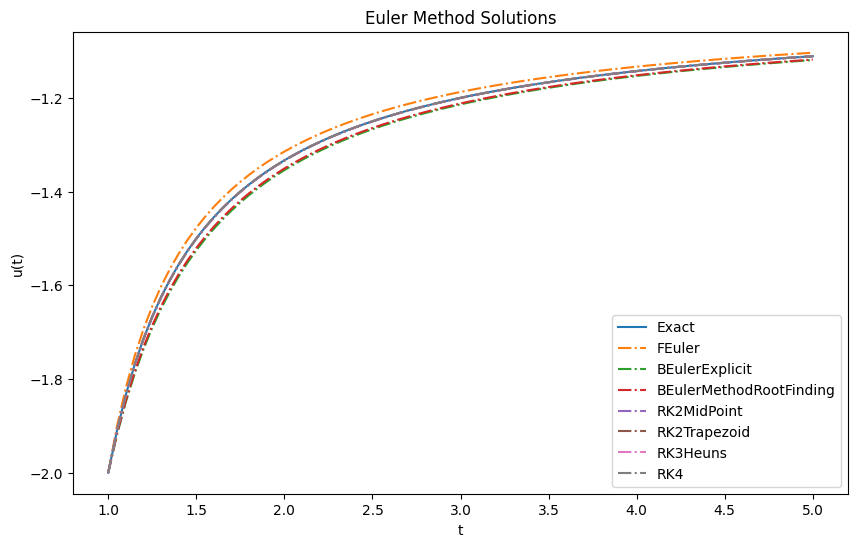

In [10]:
functions = [FEuler, BEulerExplicit, BEulerMethodRootFinding, RK2MidPoint, RK2Trapezoid, RK3Heuns, RK4]
approximations = {func: None for func in functions}
for key in approximations.keys():
    approximations[key] = key(t0, tN, k, f, U0)

t = approximations[functions[0]].t
# Result Analysis
plt.figure(figsize=(10, 6))
plt.plot(t, ue(t), label='Exact')

for key in approximations.keys():
    plt.plot(approximations[key].t, approximations[key].U, '-.', label=key.__name__)

plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend(loc='best')
plt.title('Euler Method Solutions')
plt.show()

Comparison of the approximations by computing the error.

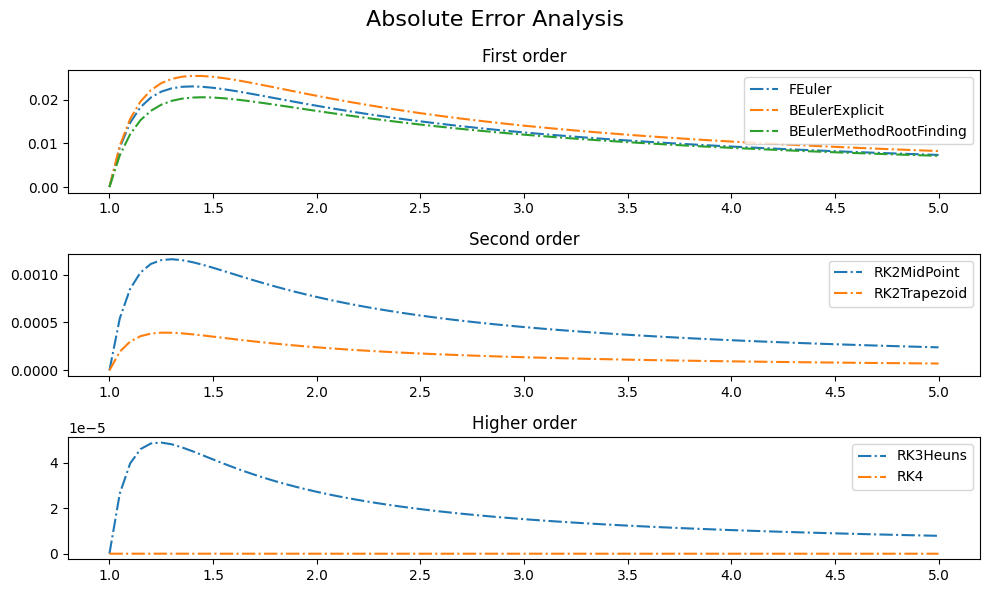

In [11]:
error_dict = dict.fromkeys(functions, None)

for key in error_dict.keys():
    error_dict[key] = np.fabs(ue(t) - approximations[key].U)

fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for key in functions[:3]:
    axes[0].plot(t, error_dict[key], '-.', label=key.__name__)
    axes[0].set_title("First order")
    axes[0].legend(loc='best')


for key in functions[3:5]:
    axes[1].plot(t, error_dict[key], '-.', label=key.__name__)
    axes[1].set_title("Second order")
    axes[1].legend(loc='best')

for key in functions[5:]:
    axes[2].plot(t, error_dict[key], '-.', label=key.__name__)
    axes[2].set_title("Higher order")
    axes[2].legend(loc='best')

plt.suptitle("Absolute Error Analysis", fontsize=16)
plt.tight_layout()
plt.show()

Computation the corresponding global error for $k=0.2 / 2^k$, k = 0,1,2,3,4,5,6

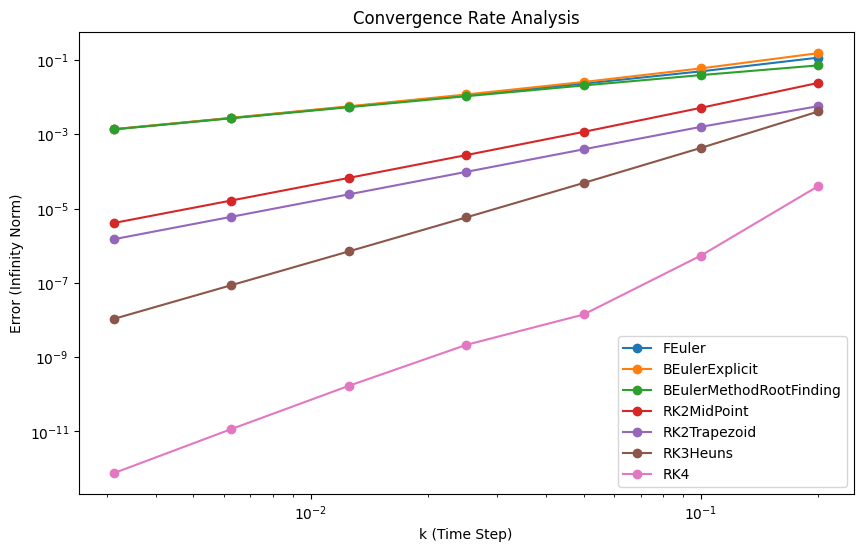

In [12]:
kvec = 0.2 / 2.0**np.arange(7)

error_norms = {key: [] for key in functions}
for k in kvec:
    for key in functions:
        approximation = key(t0, tN, k, f, U0)
        E = ue(approximation.t) - approximation.U
        E_infnorm = np.linalg.norm(E, np.inf)
        error_norms[key].append(E_infnorm)

plt.figure(figsize=(10, 6))

for key in functions:
    plt.loglog(kvec, error_norms[key], 'o-', label=key.__name__)

plt.xlabel('k (Time Step)')
plt.ylabel('Error (Infinity Norm)')
plt.title('Convergence Rate Analysis')
plt.legend()

plt.show()
